# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [151]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIT-Assesments/Classification/ExtraaLearn.csv")

In [152]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [153]:
data.shape

(4612, 15)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

*  ```age, website_visits, time_spent_on_website, page_views_per_visit, and status```
are of numeric variables while rest of the columns are of object type.
* There are **no null values** in the dataset.
* There are 4,612 data points.
* The column ```ID``` contains just indices without adding information, so it can be removed from data.
* The column 'status' is the target variable to see if the leads are converted to sales or not

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?


### Summary Statistics

In [155]:
numerical_columns = data.select_dtypes('number').columns

data[numerical_columns] .describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


**Observations**
* **age** - The average age in EdTech is 46, with the youngest at 18 and the oldest at 63. beyond 75% are beyond the age of 36.
* **website_visits** - The average number of visits per website is 3.5. There is a significant difference between the 75th and maximum percentiles, indicating the possibility of an outlier.
* **time_spent_on_website** - Time spent on the website ranges from 0 to 2537s (0 to 42min).
* **page_views_per_visit** - The average number of page views is three. There is a significant difference between the 75th and maximum percentiles, indicating the possibility of an outlier.
*  **status** - More than 75% of leads were not converted.


We compare visualisations of converted and non-converted leads using histograms, kde plots, and box plots of numerical variables.




age


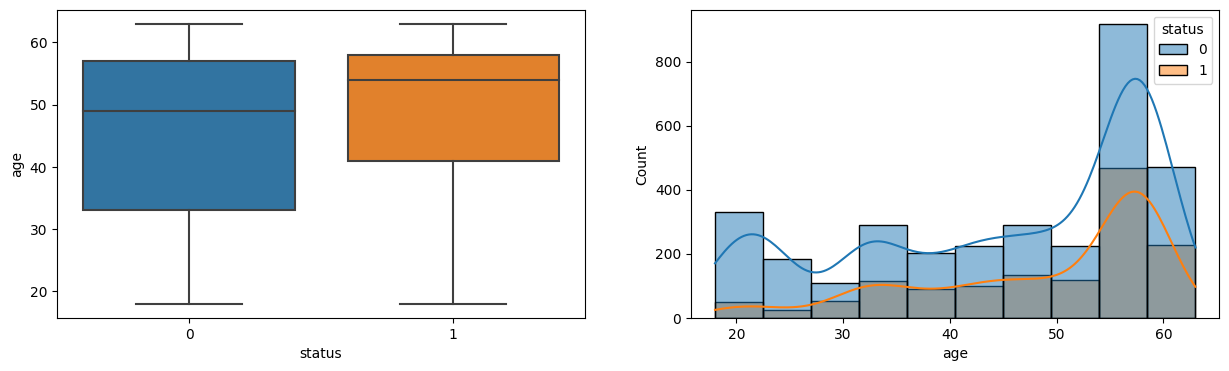

website_visits


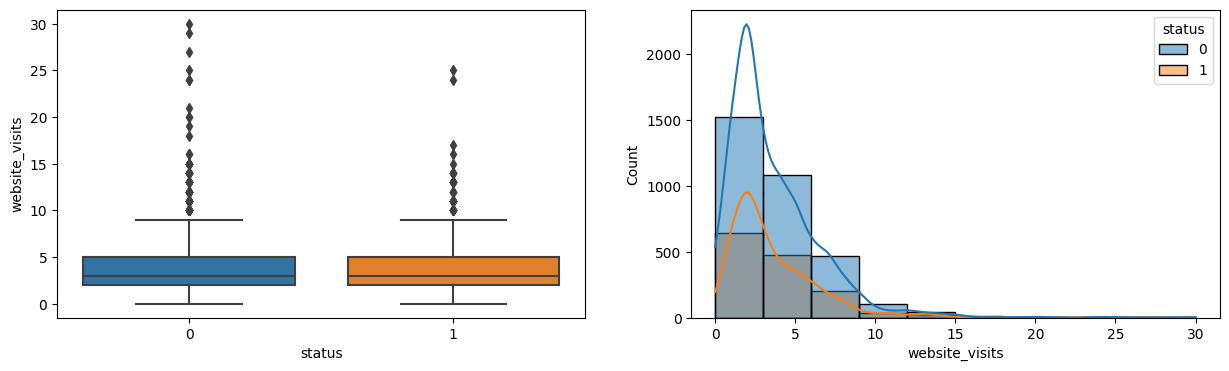

time_spent_on_website


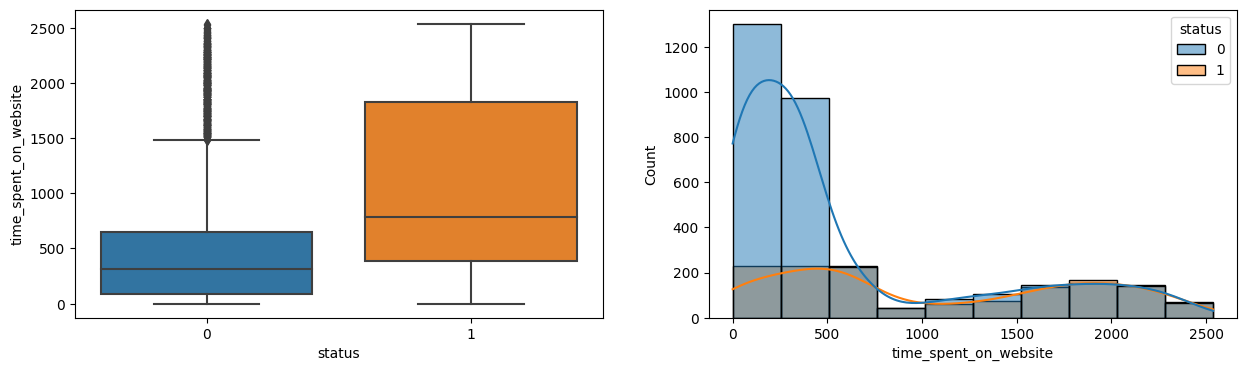

page_views_per_visit


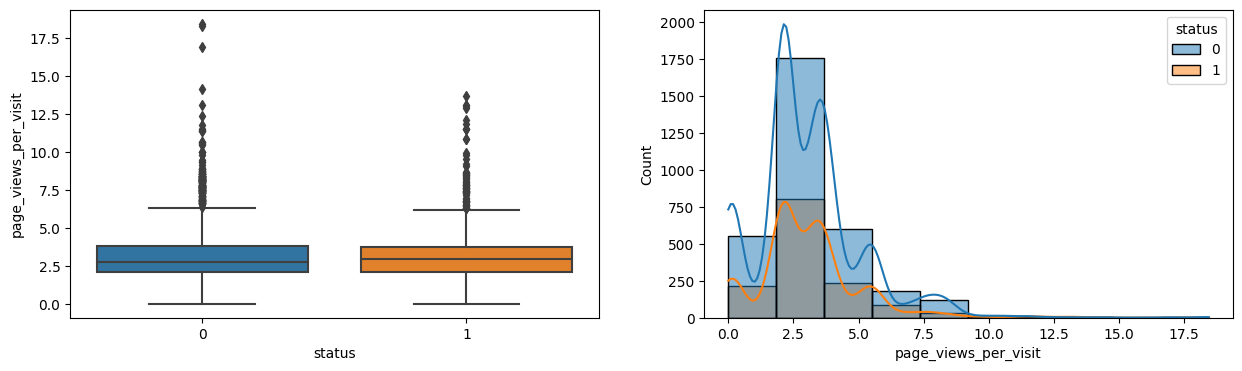

status


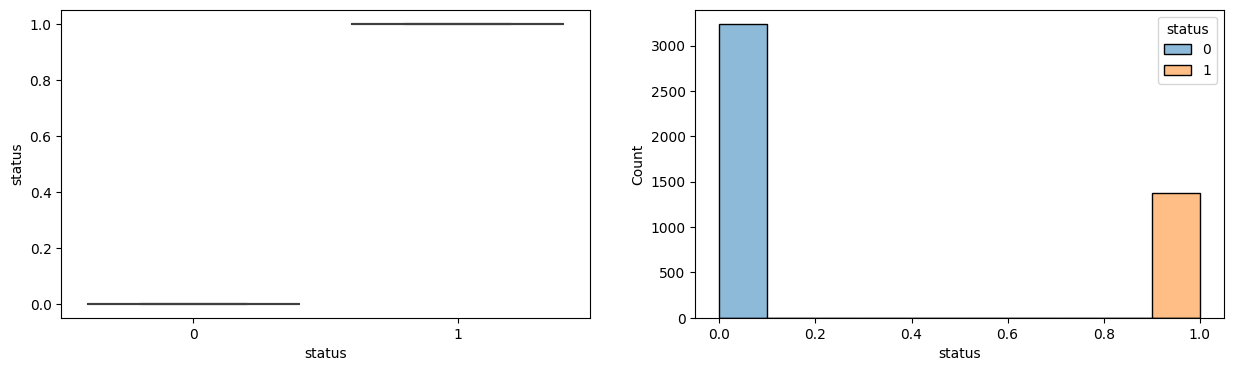

In [156]:
for col in numerical_columns:
    print(col)

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, y=col, x='status')

    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=col, bins = 10, hue=data['status'], kde=True)

    plt.show()

**Observations**
* The age distribution is skewed, with around half of non-converted leads ranging from 33 to 57, and half of converted leads ranging from 41 to 58.
* ```website_visits``` are consistent between converted and non-converted leads, with a little right skew due to the fact that the majority of visitors appear to have visited the site less than ten times.
* ```time_spent_on_the_website``` varies between converted and non-converted leads, with half of non-converted leads leaving within 700 seconds, resulting in a minimum and subsequently a maximum for the remaining users around 1800 seconds.
* ```page_views_per_visit``` are roughly evenly distributed between converted and non-converted groups.
* Outliers can be found in ```website_visits, time_spent_on_the_website```, and ```page_views_per_visit```.


#### Analysis of Categorical Columns

In [157]:
categorical_columns = list(data.select_dtypes("object").columns)

print("Count of Each Unique Value in Each Column")
for column in categorical_columns:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

Count of Each Unique Value in Each Column
EXT001     0.000217
EXT2884    0.000217
EXT3080    0.000217
EXT3079    0.000217
EXT3078    0.000217
             ...   
EXT1537    0.000217
EXT1536    0.000217
EXT1535    0.000217
EXT1534    0.000217
EXT4612    0.000217
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes   

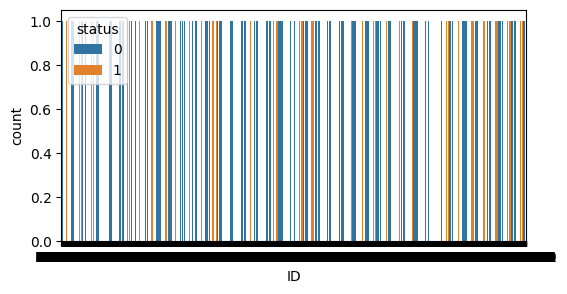

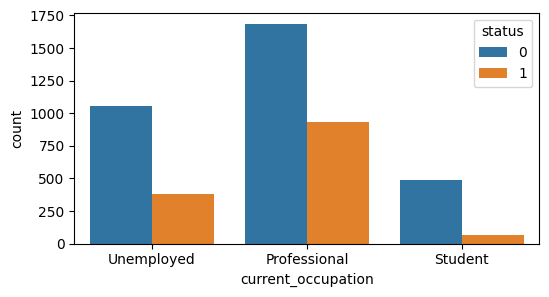

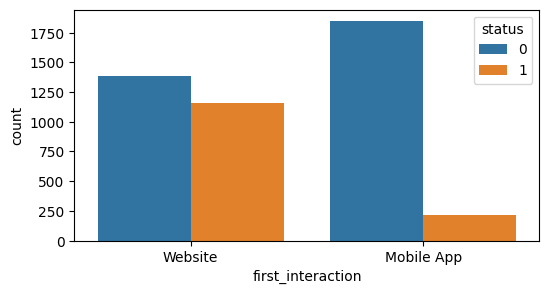

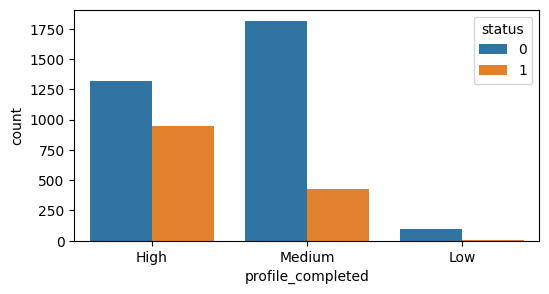

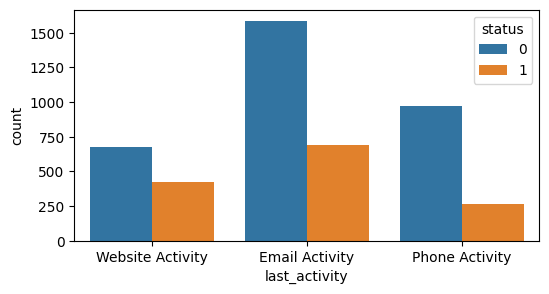

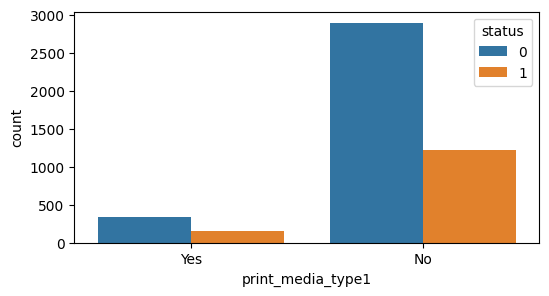

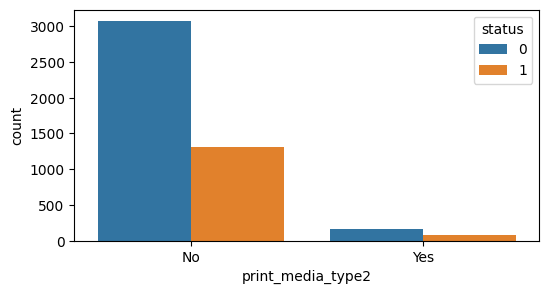

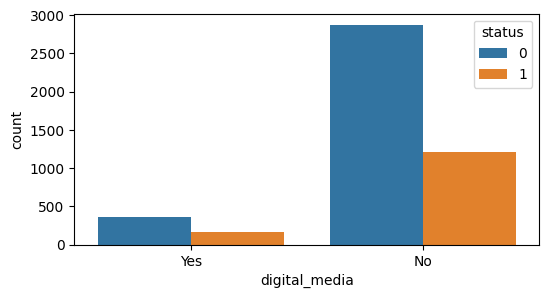

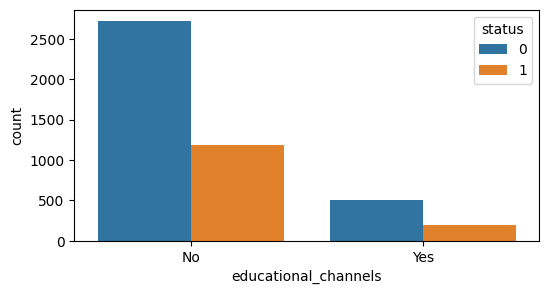

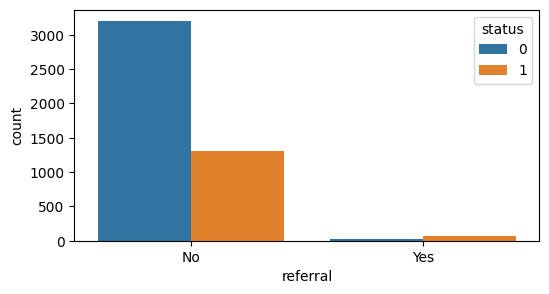

In [158]:
for col in categorical_columns:

    plt.figure(figsize = (6, 3))

    sns.countplot(x = col, hue = 'status', data = data)

    plt.show()

We can try to answer some of the questions using these visualisations. Although some observations require additional investigation:

*Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.*

  We can see that working professionals and unemployed, as opposed to students, are interested in these courses. Working professionals are the ones who convert the most frequently to paying consumers.

---


*The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?*

  Leads whose first encounter is with the website appear to convert at a considerably higher percentage.

---
*The company uses multiple modes to interact with prospects. Which way of interaction works best?*

  According to conversion rates, online activity appears to be the most effective, followed by email activity (700/1600=0.43) and phone activity (250/1000=0.25). The raw number of users converted after email activity, on the other hand, is larger.

---
*People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?*

  It appears that profile completeness directly relate to conversion positively. Customers tend to pay for courses if they have a complete profile.




In [159]:
advertising_channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
rate = []

for channel in advertising_channels:
    # Users who have seen the ad in channel
    seen = data[data[channel]=='Yes']
    # Counts of converted (1) vs. non-converted (0) users
    counts = seen['status'].value_counts(normalize = True)
    # Conversion rate
    rate.append(counts[1])

display(pd.DataFrame(rate, columns=['conversion_rate'], index=advertising_channels).sort_values(by='conversion_rate', ascending=False))

,conversion_rate
referral,0.677419
print_media_type2,0.321888
print_media_type1,0.319920
digital_media,0.318786
educational_channels,0.279433


**Observations:**

* ```referral``` appears to have the highest conversion rate, followed by ```print_media_type2``` and ```print_media_type1```.

* Aside from referrals, the variation between channels is minor. Furthermore, the samples are limited, and this estimate does not take into account the potential that a user learned about the course offering through multiple channels.


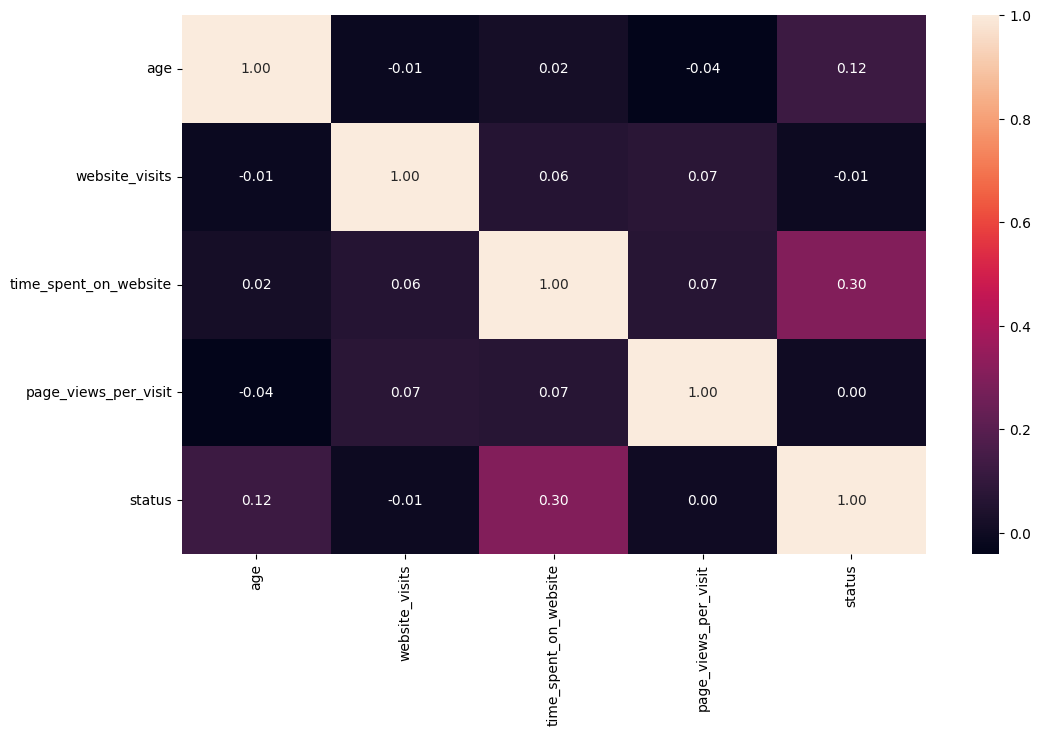

In [160]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = '.2f')

plt.show()

**Observations**
Only time spent on the website and status exhibit a correlation but it is a weak - positive correlation.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

The data contains no missing values.
We can observe that each ID is a unique value for each record which does not add information to the model. Therefore it will be dropped.

In [161]:
print(data['ID'].nunique())
data.drop(['ID'], axis=1, inplace = True)

4612


In [162]:
# Separating the target variable and other variables
X = data.drop(columns = 'status')

Y = data['status']

We must encode categorical features so that they are modelling ready.

In [163]:
X = pd.get_dummies(X, drop_first = True)

Decision trees and random forests are thought to be resistant to outliers. Therefore, no special treatments for outliers are needed.
We'll divide the data into train and test datasets.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [165]:
X_train

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
2462,57,2,26,0.109,0,1,0,0,0,0,0,0,0,0,0,0
1621,57,7,385,8.201,0,0,1,0,1,1,0,0,0,1,1,0
197,32,9,2001,2.178,0,1,1,0,1,0,0,0,0,0,0,0
2181,34,3,318,3.926,0,0,0,0,1,0,0,1,0,0,0,0
2867,37,4,211,2.010,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,56,1,281,5.347,0,1,0,0,0,0,0,0,0,0,0,0
2763,44,1,64,5.051,0,0,1,0,0,0,1,0,1,0,1,0
905,26,1,211,0.291,0,0,1,0,1,0,0,0,0,0,0,0
3980,57,1,1186,1.224,0,1,1,0,0,0,1,0,0,0,0,0


In [166]:
print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))


Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in the test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


In [167]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3228.0,46.221190,13.129567,18.0,36.000,51.0000,57.000,63.000
website_visits,3228.0,3.579306,2.856375,0.0,2.000,3.0000,5.000,30.000
time_spent_on_website,3228.0,712.700743,736.498960,0.0,147.000,374.0000,1288.750,2531.000
page_views_per_visit,3228.0,3.015100,1.943072,0.0,2.081,2.6825,3.755,16.914
current_occupation_Student,3228.0,0.119269,0.324155,0.0,0.000,0.0000,0.000,1.000
current_occupation_Unemployed,3228.0,0.313197,0.463866,0.0,0.000,0.0000,1.000,1.000
first_interaction_Website,3228.0,0.554833,0.497061,0.0,0.000,1.0000,1.000,1.000
profile_completed_Low,3228.0,0.024783,0.155488,0.0,0.000,0.0000,0.000,1.000
profile_completed_Medium,3228.0,0.488228,0.499939,0.0,0.000,0.0000,1.000,1.000
last_activity_Phone Activity,3228.0,0.271685,0.444897,0.0,0.000,0.0000,1.000,1.000


In [168]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1384.0,46.154624,13.240173,18.0,36.000,50.5000,57.000,63.000
website_visits,1384.0,3.537572,2.765353,0.0,2.000,3.0000,5.000,25.000
time_spent_on_website,1384.0,750.391618,760.265565,0.0,159.000,382.0000,1455.750,2537.000
page_views_per_visit,1384.0,3.051840,2.025833,0.0,2.071,2.9455,3.764,18.434
current_occupation_Student,1384.0,0.122832,0.328363,0.0,0.000,0.0000,0.000,1.000
current_occupation_Unemployed,1384.0,0.310694,0.462945,0.0,0.000,0.0000,1.000,1.000
first_interaction_Website,1384.0,0.542630,0.498359,0.0,0.000,1.0000,1.000,1.000
profile_completed_Low,1384.0,0.019509,0.138354,0.0,0.000,0.0000,0.000,1.000
profile_completed_Medium,1384.0,0.480491,0.499800,0.0,0.000,0.0000,1.000,1.000
last_activity_Phone Activity,1384.0,0.257948,0.437663,0.0,0.000,0.0000,1.000,1.000


## Building a Decision Tree model

In [169]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()


In [170]:
# Building and fitting decision tree model
dt_clf = DecisionTreeClassifier(random_state = 1)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Do we need to prune the tree?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



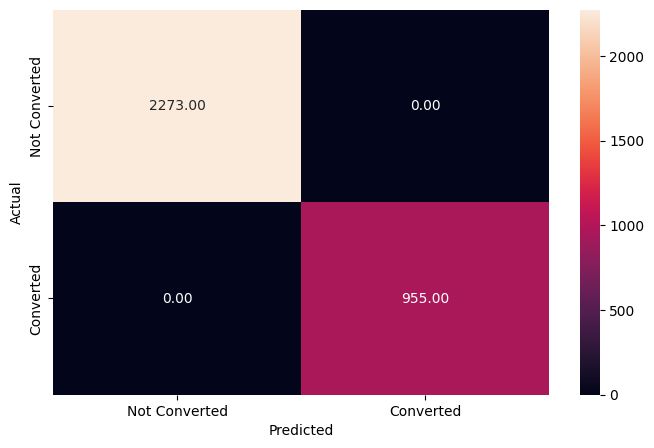

In [171]:
y_train_pred_dt_clf = dt_clf.predict(X_train)
metrics_score(y_train, y_train_pred_dt_clf)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



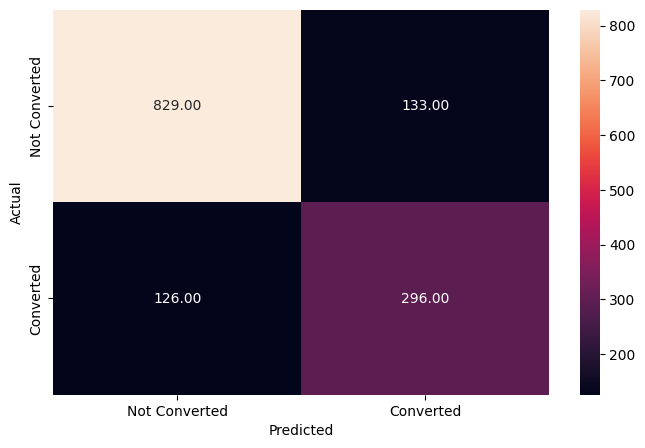

In [172]:
y_test_pred_dt_clf = dt_clf.predict(X_test)
metrics_score(y_test, y_test_pred_dt_clf)

**Observations**
According to the confusion matrix on the training set, all metrics are 1, and on the confusion matrix for the test set, it is considerably low, indicating that the model is overfitting.    

Therefore, we need to prune the tree.

In [173]:
# Choose the type of classifier
dt_clf_gscv = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 10),
    'criterion': ['entropy', 'gini'],
    'min_samples_split': [5, 10, 20, 25],
}
# Run the grid search
grid_obj = GridSearchCV(dt_clf_gscv, parameters, cv=5, scoring='recall', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_clf_pruned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dt_clf_pruned.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_split=5, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



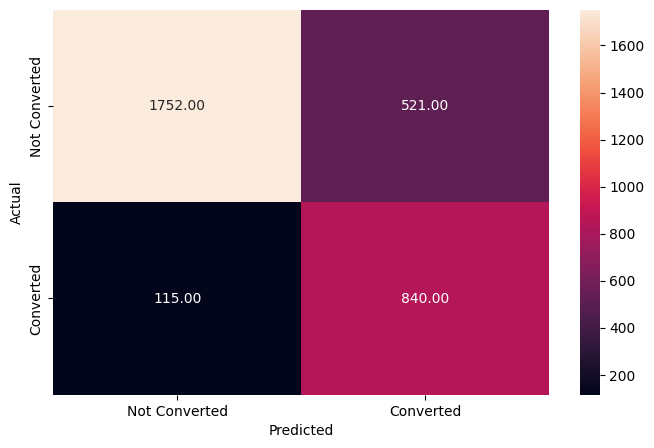

In [174]:
y_train_pred_dt_clf_pruned = dt_clf_pruned.predict(X_train)
metrics_score(y_train, y_train_pred_dt_clf_pruned)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.87      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.84      0.80      0.80      1384



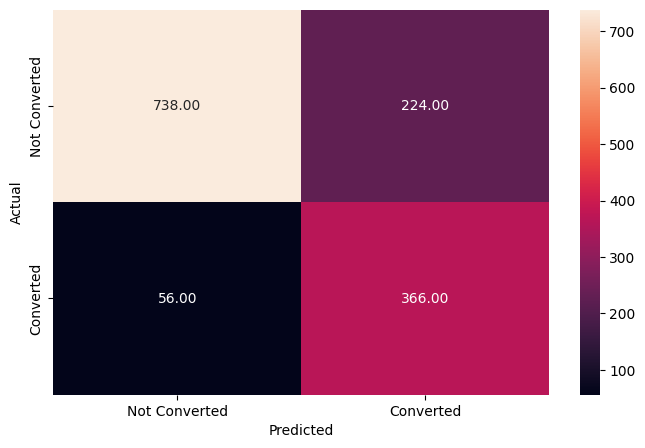

In [175]:
y_test_pred_dt_clf_pruned = dt_clf_pruned.predict(X_test)
metrics_score(y_test, y_test_pred_dt_clf_pruned)

**Observations**
The performance indicators between the training and test data sets are now close, indicating that the model generalises well and that we have decreased overfitting.


In [176]:
# Importance of features in the tree building

feature_imt = pd.DataFrame(dt_clf_pruned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
feature_imt

,Imp
time_spent_on_website,0.348136
first_interaction_Website,0.327024
profile_completed_Medium,0.239573
current_occupation_Student,0.045106
last_activity_Website Activity,0.021504
age,0.018657
website_visits,0.000000
page_views_per_visit,0.000000
current_occupation_Unemployed,0.000000
profile_completed_Low,0.000000


**Observations**

Only the features ```time_spent_on_website```, ```first_interaction```, ```profile_completed```, ```last_activity```, ```current_occupation```,```age``` contribute to the model. We can prune the rest of the features.

## Building a Random Forest model

In [177]:
rf_clf =  RandomForestClassifier(random_state = 1, criterion = 'entropy', class_weight = 'balanced')
rf_clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



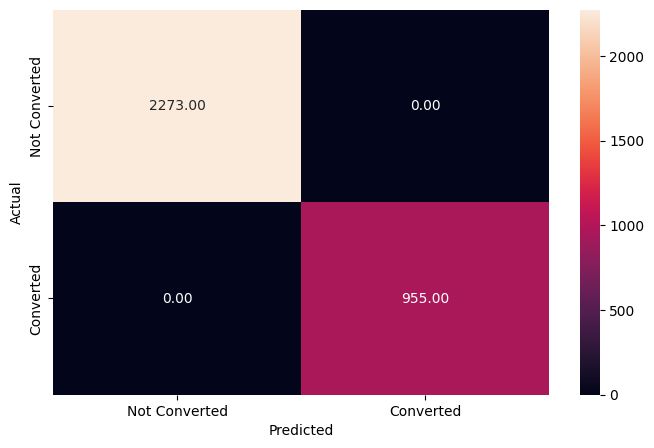

In [178]:
y_pred_rf_clf = rf_clf.predict(X_train)
metrics_score(y_train, y_pred_rf_clf)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.80      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



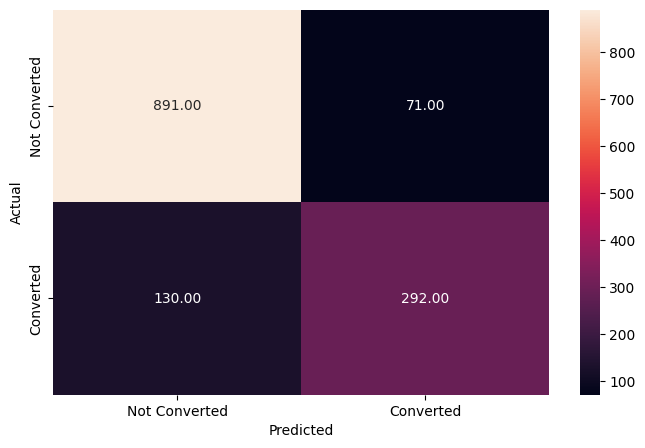

In [179]:
y_test_pred_rf_clf = rf_clf.predict(X_test)
metrics_score(y_test, y_test_pred_rf_clf)

**Observations:**

The random forest, like the decision tree, performs perfectly or better on training data indicating overfitting.

## Do we need to prune the tree?

In [180]:
rf_clf_gscv = RandomForestClassifier(criterion = "entropy", random_state = 1)

parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

scorer = metrics.make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(rf_clf_gscv, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

rf_clf_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.85      3228



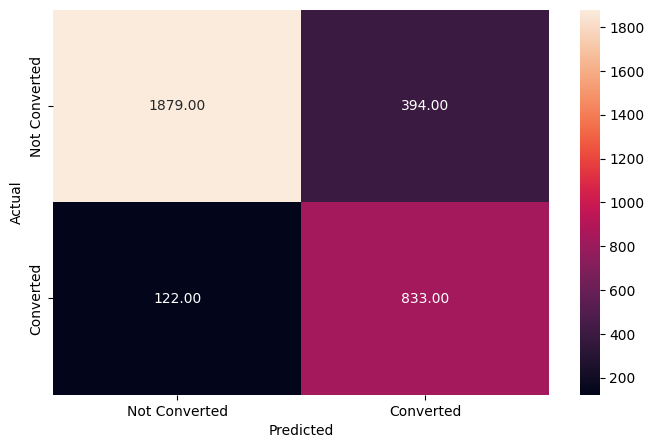

In [181]:
y_pred_rf_clf_tuned = rf_clf_tuned.predict(X_train)
metrics_score(y_train, y_pred_rf_clf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       962
           1       0.69      0.86      0.76       422

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.86      0.84      0.84      1384



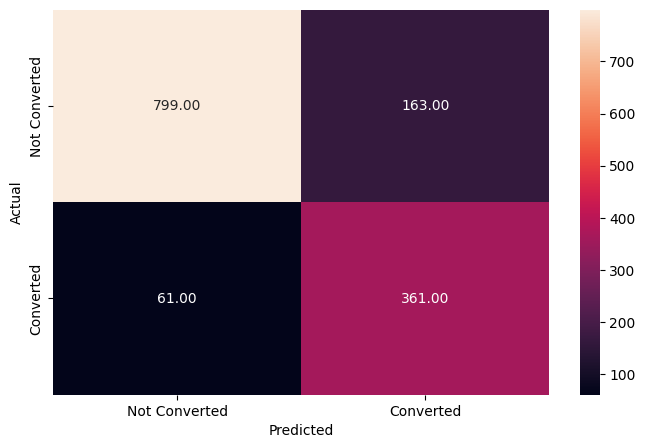

In [182]:
y_pred_rf_clf_tuned = rf_clf_tuned.predict(X_test)
metrics_score(y_test, y_pred_rf_clf_tuned)

In [183]:
feature_imt = pd.DataFrame(rf_clf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
feature_imt

,Imp
time_spent_on_website,0.301423
first_interaction_Website,0.280526
profile_completed_Medium,0.199935
age,0.049942
last_activity_Phone Activity,0.038569
current_occupation_Unemployed,0.038134
current_occupation_Student,0.032424
last_activity_Website Activity,0.028860
page_views_per_visit,0.016797
website_visits,0.010304


## Actionable Insights and Recommendations

We were able to create tree-based models that the organisation may use to anticipate which leads are likely to convert and organise their marketing tactics appropriately. On the test data, the tweaked random forest model has the highest Recall score of 86% and the macro average of 84%. The Decision tree model overfits the training data and has an 87% recall on the test data. The tuned Decision Tree model is more balanced and produces more generalised outcomes on both training and testing data.

The company will be able to anticipate which leads will be converted and which will not be converted using the tuned random forest model, which has an 86% Recall score with good precision and F1 scores.

Unlike the decision tree, the random forest considers other variables such as profession and page_views_per_visit. This means that, in comparison to the decision tree, the random forest prioritises more aspects.

Looking at significant variables, we can state that the model's major factors are time_spent_on_website, age, profile_completion, and age, based on the feature importances.


Based on the above insights, the following recommendations can be made.

* Concentrate conversion efforts on interactions via the website and online platforms, while phone engagement appears to create substantially lower conversion rates.
* Conduct further website activity analysis to better understand how people spend their time on the website and, in particular, what leads to conversion.
* Conduct additional research into how advertising and advertising channels affect conversion.
* Referral leads have the highest conversion rate. Methods for increasing referrals can be investigated.
* Attempt to focus advertising to certain demographics, such as late-career professionals wishing to upskill or reskill.
